In [1]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [2]:
image_dir = r"C:\Users\LENOVO\Documents\school\SEM 5\Machine Learning\datasets\train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


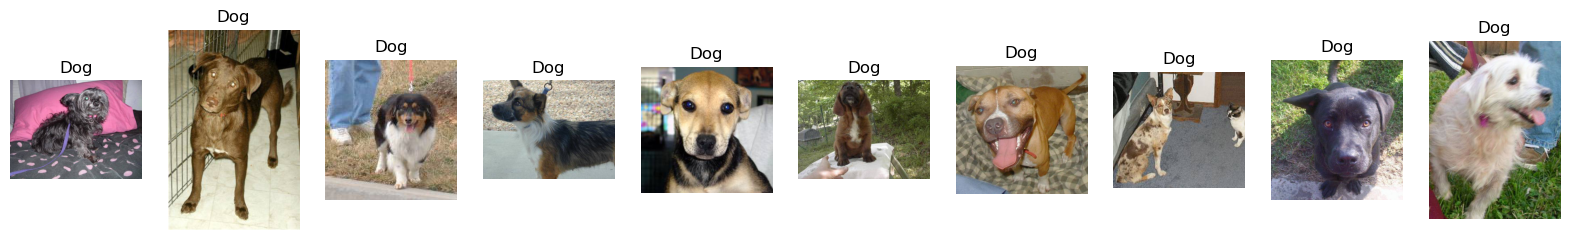

In [3]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

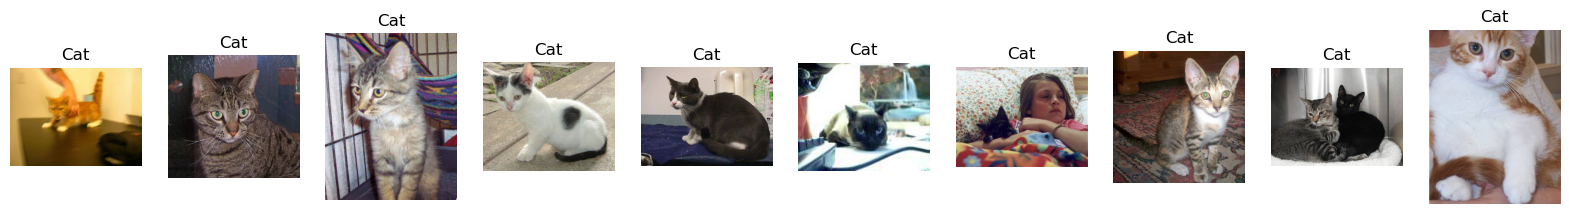

In [4]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

In [5]:
# train test split using dataframe

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19128\1898446895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19128\1898446895.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19128\1898446895.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

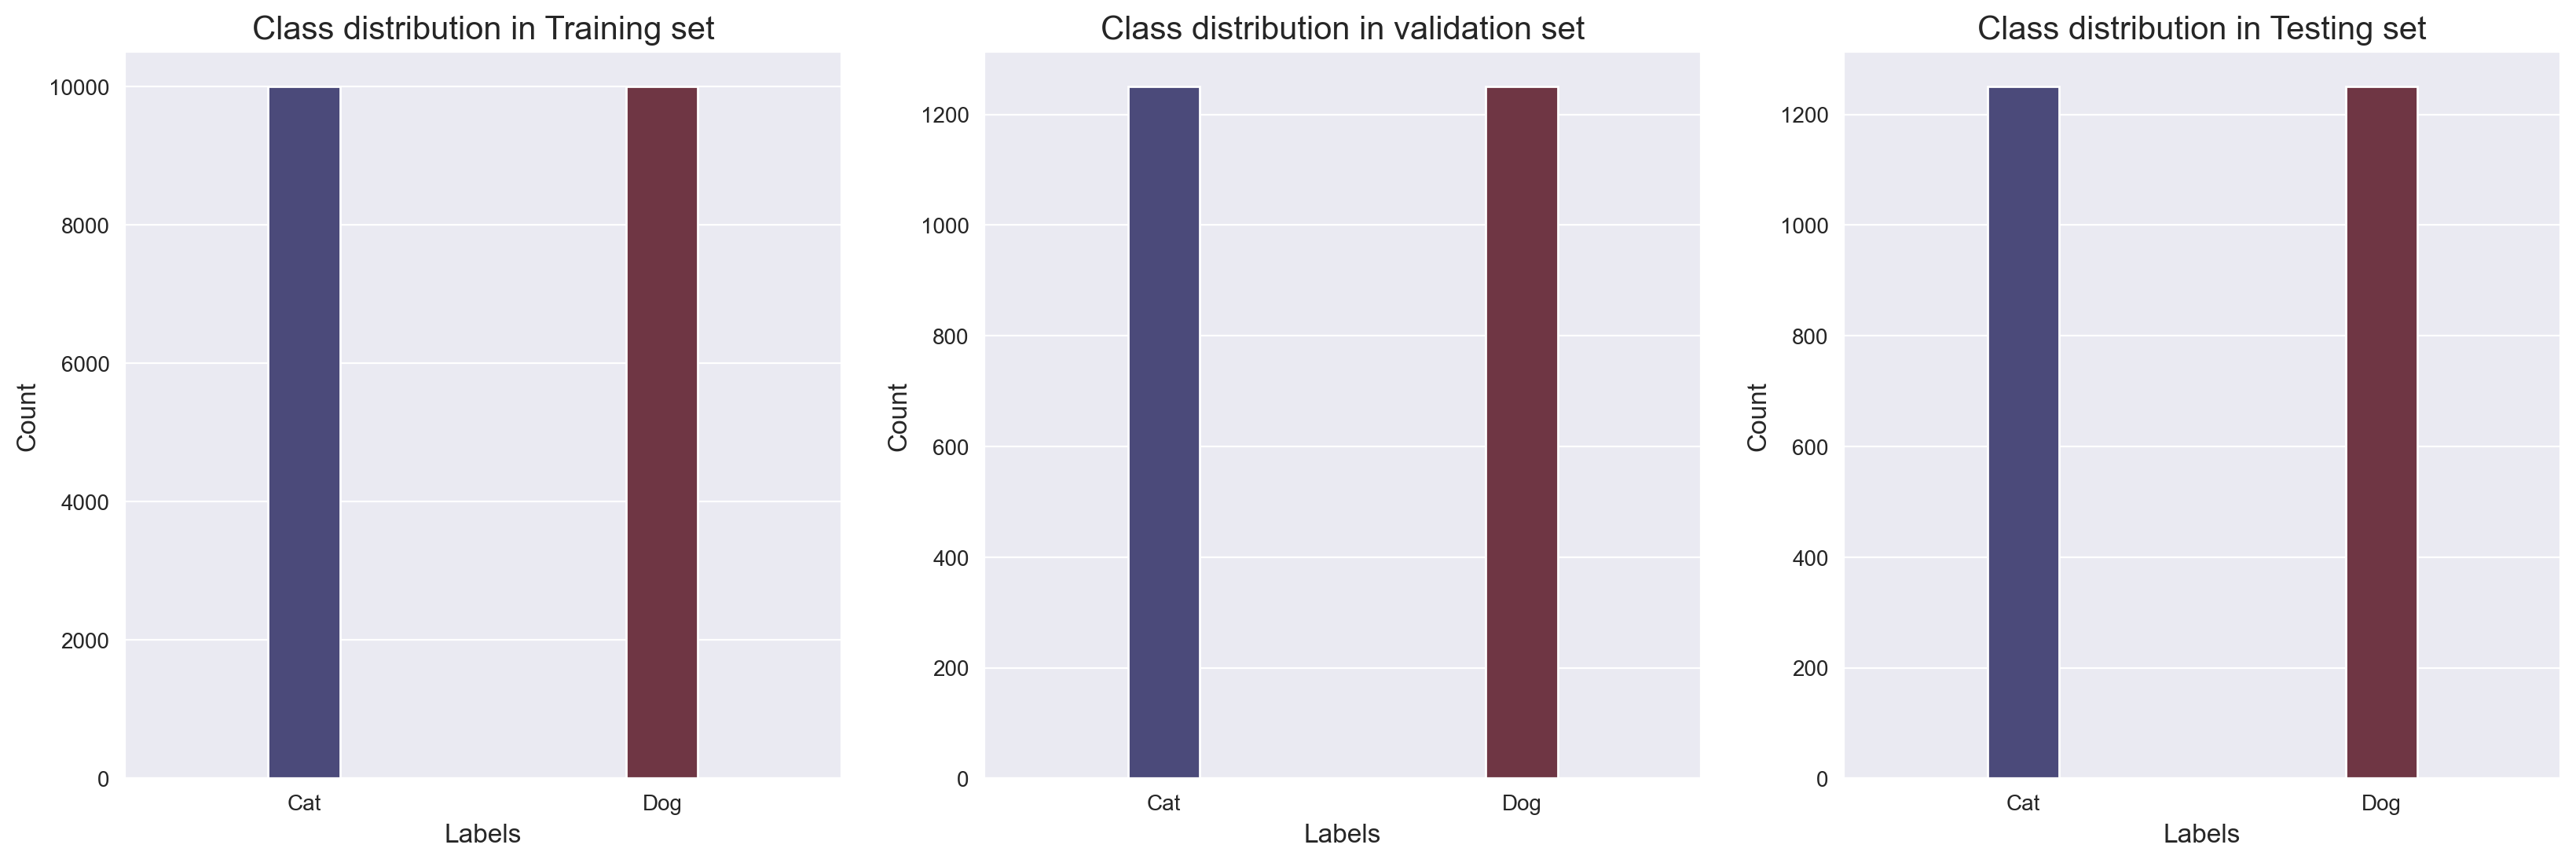

In [6]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

In [7]:
# create directories
dataset_home = 'C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/train/'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)

            
path1 = "C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/train/cats"
path2 = "C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/train/dogs"
path3 = "C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/test/cats"
path4 = "C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/test/dogs"

print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 9945
Then number of dog images in training data is 9965
Then number of cat images in validation data is 2555
Then number of dog images in validation data is 2535


In [8]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [9]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_gen = train_datagen.flow_from_directory('C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/train/', 
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('C:/Users/LENOVO/Documents/school/SEM 5/Machine Learning/datasets/dataset_dogs_vs_cats/test/', 
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [11]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
cat_dog = model.fit(train_gen,
                    validation_data = val_gen, 
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                    batch_size=128
                   )

Epoch 1/30
623/623 [==============================] - 377s 595ms/step - loss: 0.6709 - accuracy: 0.6548 - val_loss: 0.6450 - val_accuracy: 0.6601 - lr: 0.0010
Epoch 2/30
623/623 [==============================] - 183s 294ms/step - loss: 0.5139 - accuracy: 0.7457 - val_loss: 0.5942 - val_accuracy: 0.7139 - lr: 0.0010
Epoch 3/30
623/623 [==============================] - 179s 287ms/step - loss: 0.4416 - accuracy: 0.7922 - val_loss: 0.4018 - val_accuracy: 0.8220 - lr: 0.0010
Epoch 4/30
623/623 [==============================] - 194s 312ms/step - loss: 0.3876 - accuracy: 0.8232 - val_loss: 0.5652 - val_accuracy: 0.7497 - lr: 0.0010
Epoch 5/30
623/623 [==============================] - 188s 301ms/step - loss: 0.3495 - accuracy: 0.8413 - val_loss: 0.3038 - val_accuracy: 0.8731 - lr: 0.0010
Epoch 6/30
623/623 [==============================] - 177s 285ms/step - loss: 0.3216 - accuracy: 0.8605 - val_loss: 0.2879 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 7/30
623/623 [==========================

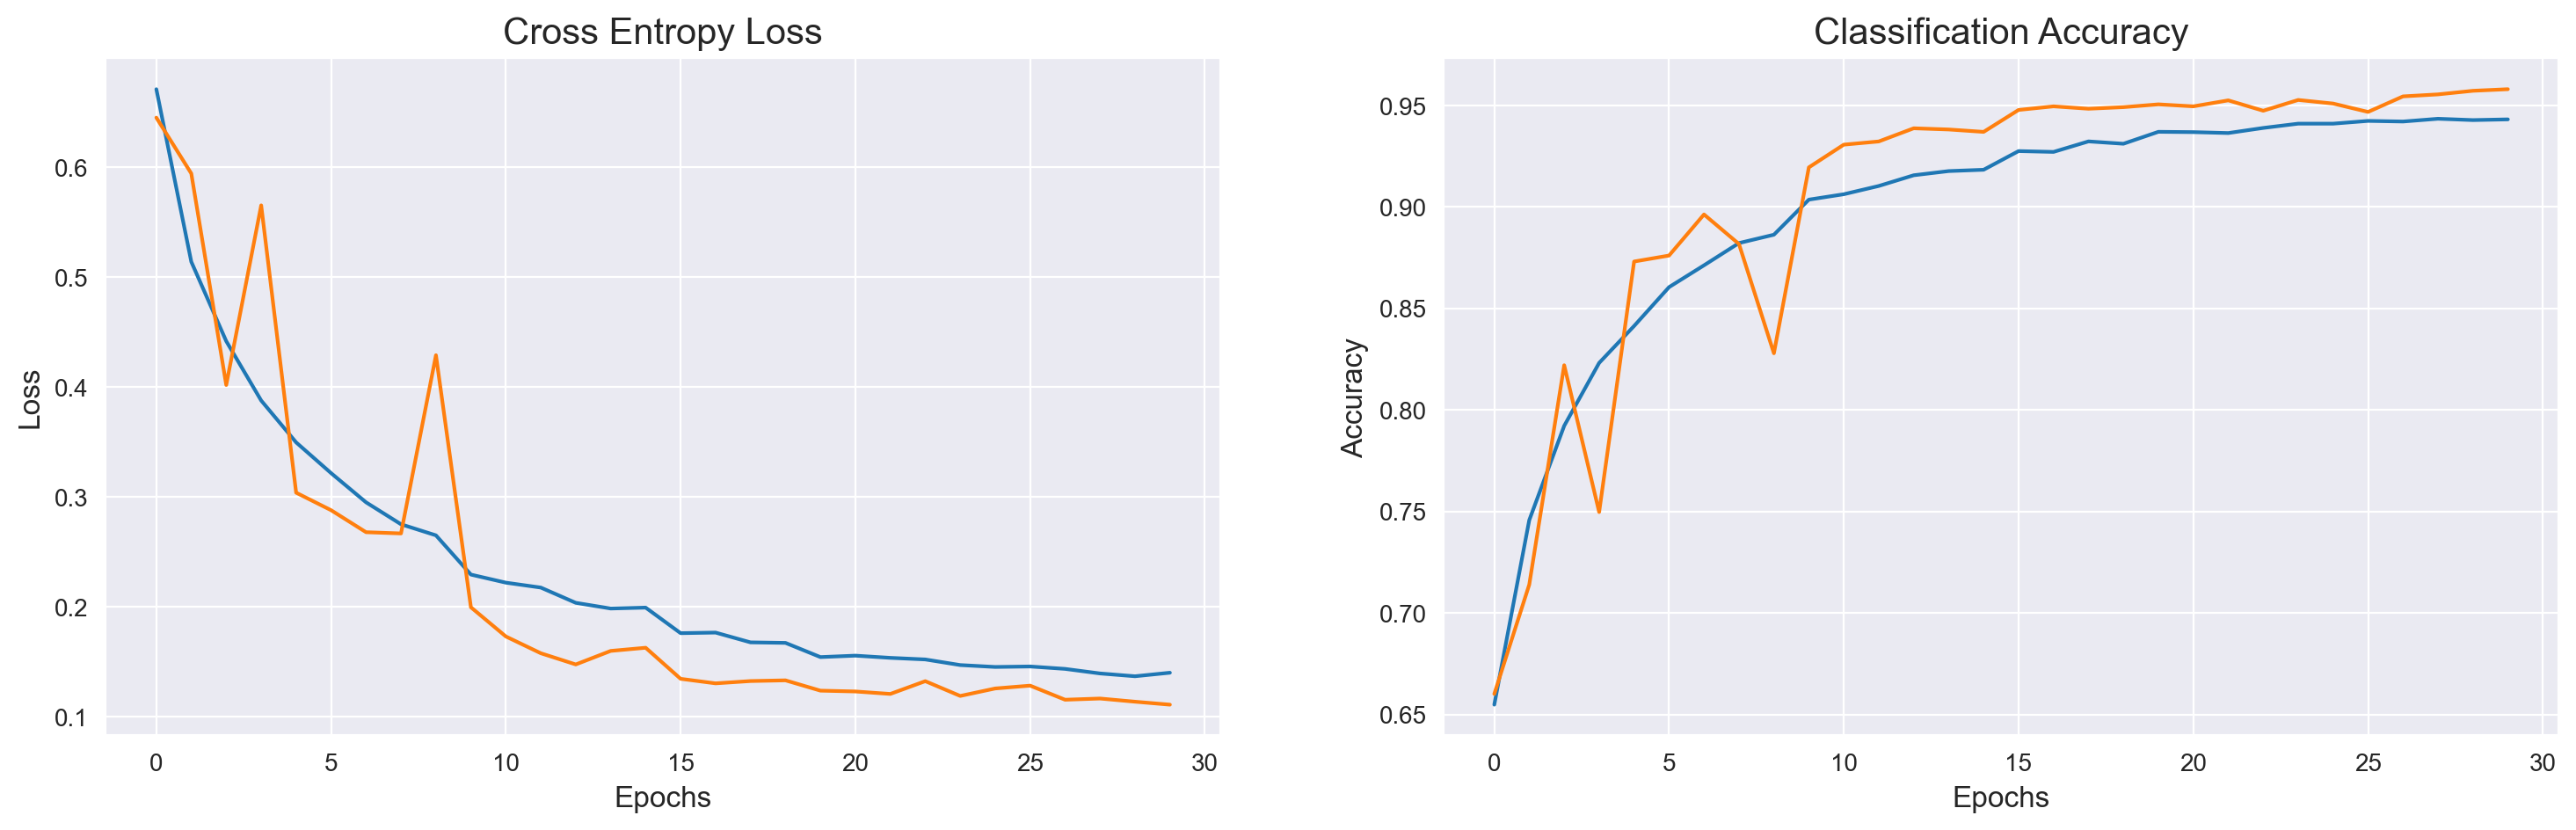

In [15]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [16]:
model.save("model_cat_vs_dog.h5")